# **Exploratory Data Analysis (EDA)**
---



## **Descriptive Statistics**
---
* `describe()`
* `value_count()`
* `boxplot()`
* `scatter()`


## **Grouping data**
---
* `groupby()`
* `pivot()`
* `pcolor()` <-- heatmap

## **Tipos de gráficas en Python**
* `plt.plot(x,y)`
* `plt.scatter(x,y)`
* `plt.hist(x,bins)`
* `plt.bar(x, height)`
* `plt.pcolor(C)`
* `sns.regplot(x = "header_1", y="header_2", data=df)`. Regrese un sactter plot de x y y, junto a un modelo de regresión con una confianza del 95%.
* `sns.residplot(data=df, x="header_1",y="header_2")`. Muestra la calidad de la regresión polinomial.
* `sns.kdeplot(X)`. Kernel Density Estimate. Crear una curve de distribución de probabilidad basado en su verosimilitus de ocurrencia.
* `sns.displot(X, hist=True)` Gráfica de distribución. Combina KDE y el histograma.

### **Correlación**
---
**Correlación de Pearson**
* Mide la correlación a partir de
    * Coeficiente de correlación
    * P-value
      
* Coeficiente de correlación
    * Cercano a +1: Relación positiva
    * Cercano a -1: Relación negativa
    * Cercano a 0: No relación
      
* P-value
    * P-value < 0.001: Gran certeza del resultado.
    * P-value < 0.05:  Certeza moderada en el resultado.
    * P-value < 0.01:  Certeza baja en el resultado.
    * P-value > 0.01:  Ninguna certeza en el resultado.

 * Una **fuerte correlación** es entonces:
     * Coeficiente correlación cercano a +1 o -1
     * P-value < 0.001
    


# **Exploratory Data Analysis**
---

### **Objetivo: Descubrir cuáles son las características principales con mayor impacto en el precio del auto.**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [6]:
df = pd.read_csv("automobile.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


## ¿Cómo escoger el método correcto de visualización para variables individuales?
---
Primeramente es importante comprender con qué tipo de variables se está trabajando.

In [8]:
print(df.dtypes)

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object


In [13]:
df[["bore", "stroke", "compression-ratio", "horsepower"]].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001250,0.568527
stroke,-0.055390,1.000000,0.187923,0.100040
compression-ratio,0.001250,0.187923,1.000000,-0.214576
horsepower,0.568527,0.100040,-0.214576,1.000000


#### **Positive Linear Relationship**

(0.0, 53482.135166592125)

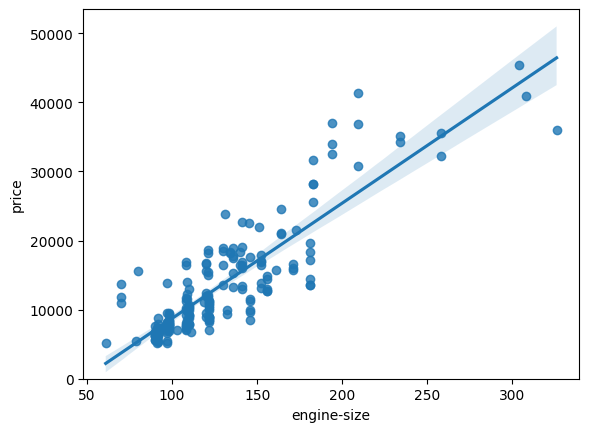

In [15]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

Cuando el tamaño de motor sube, el precio también, lo que indica que existe una correlación positiva entre ambas variables.

In [16]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<Axes: xlabel='highway-mpg', ylabel='price'>

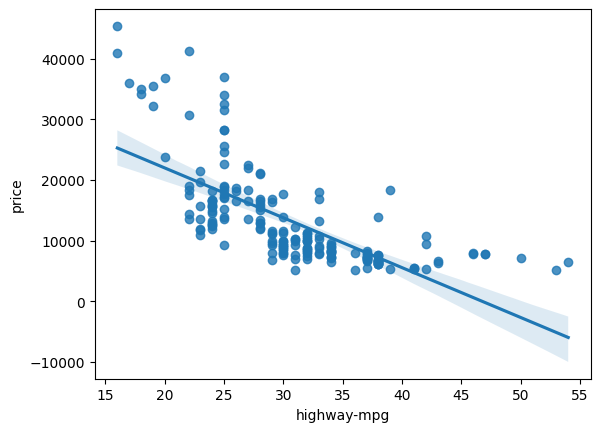

In [17]:
sns.regplot(x = "highway-mpg",y = "price", data=df)

In [18]:
df[["highway-mpg","price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


#### **Weak Linear Relationship**

<Axes: xlabel='peak-rpm', ylabel='price'>

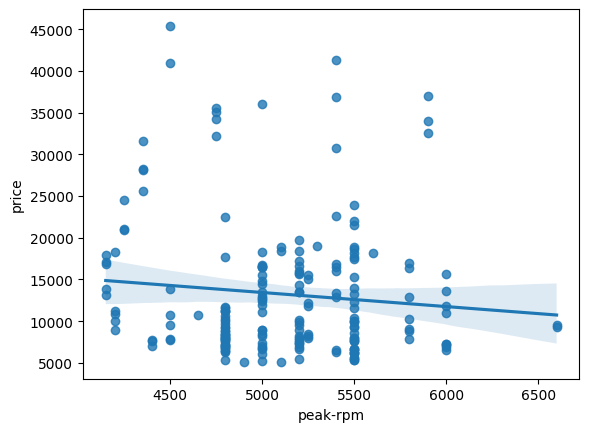

In [19]:
sns.regplot(x="peak-rpm", y = "price", data=df)

In [20]:
df[["peak-rpm", "price"]].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101649
price,-0.101649,1.000000


In [21]:
df[["stroke", "price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


<Axes: xlabel='stroke', ylabel='price'>

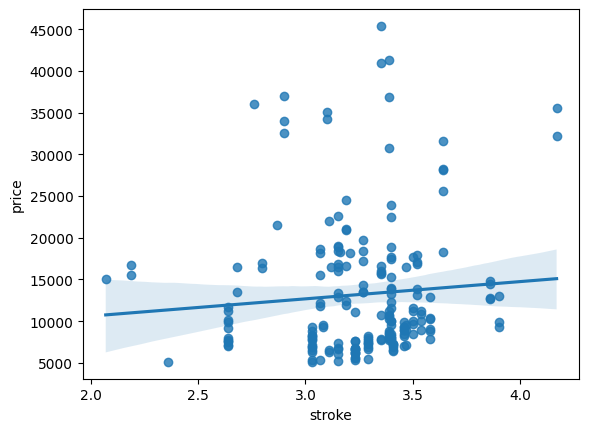

In [22]:
sns.regplot(x = "stroke", y="price", data=df)

#### **Variables categóricas**

<Axes: xlabel='body-style', ylabel='price'>

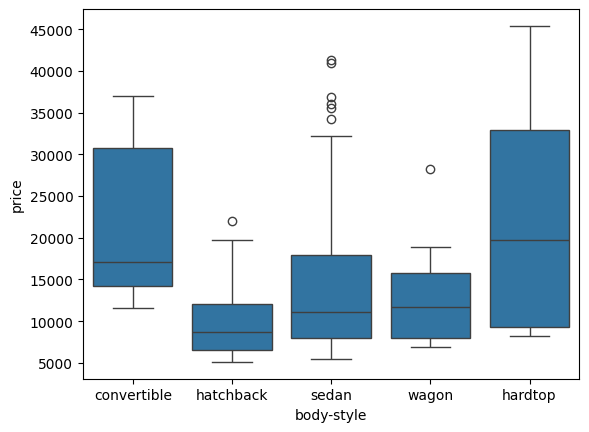

In [23]:
sns.boxplot(x="body-style", y="price", data=df)

Vemos que las distribuciones del precio entre las distintas categorías de `body-style` tienen un traslape significativo, así que esta categoría no es un buen predictor del precio.

<Axes: xlabel='engine-location', ylabel='price'>

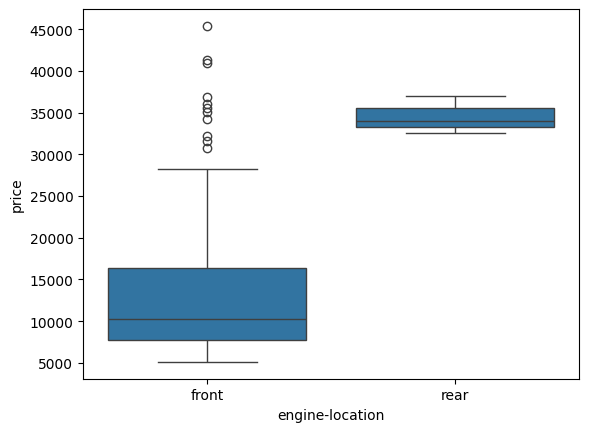

In [24]:
sns.boxplot(x="engine-location", y="price", data=df)

Se observa que la distribución entre ambas categorías son lo suficientemente distintas entre sí para ser un buen predictor para el precio.

<Axes: xlabel='drive-wheels', ylabel='price'>

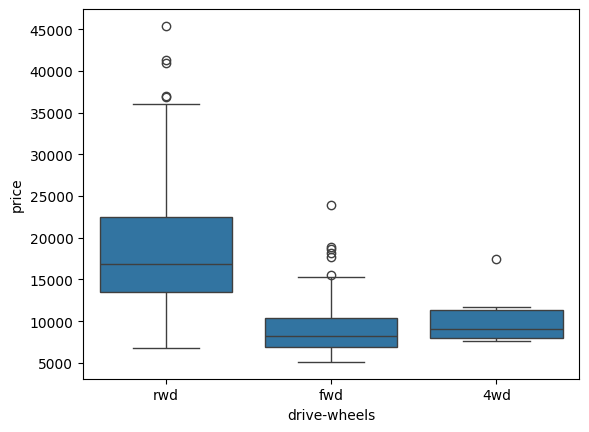

In [25]:
sns.boxplot(x="drive-wheels", y="price", data=df)

La distribución del precio entre las distintas categoráis difiere, así que también podría ser un potencial predictor.

## **Análisis descriptivo estadístico**
---


In [26]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,164.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,197.000000,201.000000,199.000000,199.000000,201.000000,201.000000,201.000000
mean,0.840796,122.000000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,35.442168,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.270793,0.319256,4.004965,37.553843,480.521824,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [27]:
df.describe(include=["object"])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,199,201,201,201,201,201,201
unique,22,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,181,165,113,94,118,198,145,157,92


#### Value Counts

In [29]:
df["drive-wheels"].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

In [30]:
df["drive-wheels"].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [42]:
drive_wheels_counts = df["drive-wheels"].value_counts().to_frame()
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [41]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts

,count
engine-location,
front,198
rear,3


## **Agrupamiento básico**


In [43]:
df["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [47]:
df_group_one = df[["drive-wheels", "price"]]

In [48]:
df_group_one = df_group_one.groupby(["drive-wheels"], as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [50]:
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1.sort_values("price")

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
2,4wd,wagon,9095.750000
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
3,fwd,convertible,11595.000000
1,4wd,sedan,12647.333333
10,rwd,hatchback,14337.777778
12,rwd,wagon,16994.222222


In [52]:
grouped_pivot = grouped_test1.pivot(index="drive-wheels", columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [53]:
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [57]:
group2 = df[["body-style", "price"]]
group2 = group2.groupby("body-style", as_index=False).mean()
group2

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


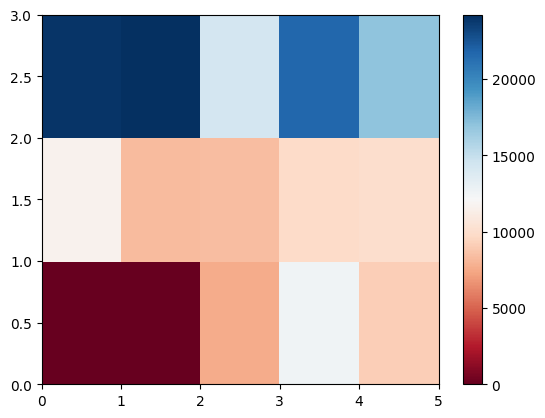

In [60]:
plt.pcolor(grouped_pivot, cmap="RdBu")
plt.colorbar()
plt.show()

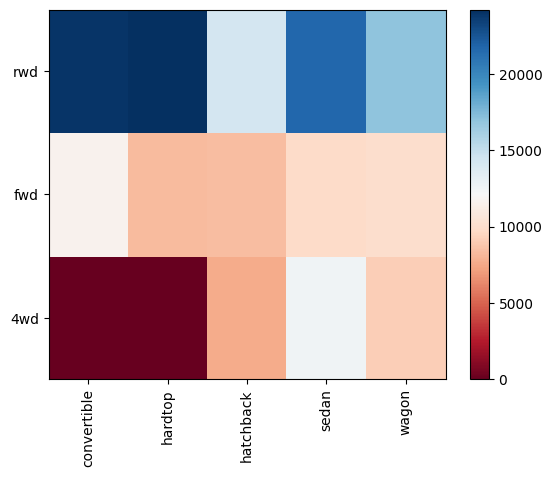

In [61]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

## **Correlación y Causa**
---
**Correlación**: medida de la interdependencia entre dos variables
**Causa**: La relación de causa y efecto entre dos variables.

In [63]:
from scipy import stats

In [64]:
pearson_coef, p_value = stats.pearsonr(df["wheel-base"], df["price"])
print(pearson_coef, p_value)

0.584641822265508 8.076488270732947e-20


In [72]:
df.horsepower.fillna(df["horsepower"].mean(), inplace=True)

C:\Users\AlxMa\AppData\Local\Temp\ipykernel_20084\3571254097.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.horsepower.fillna(df["horsepower"].mean(), inplace=True)


In [73]:
pearson_coef, p_value = stats.pearsonr(df["horsepower"], df["price"])
print(pearson_coef, p_value)

0.8096811975632288 6.058444649710116e-48


In [74]:
pearson_coef, p_value = stats.pearsonr(df["length"], df["price"])
print(pearson_coef, p_value)

0.6906283804483642 8.016477466158917e-30


In [75]:
pearson_coef, p_value = stats.pearsonr(df["width"], df["price"])
print(pearson_coef, p_value)

0.7512653440522676 9.200335510480516e-38


In [76]:
pearson_coef, p_value = stats.pearsonr(df["curb-weight"], df["price"])
print(pearson_coef, p_value)

0.8344145257702843 2.189577238893972e-53


In [77]:
pearson_coef, p_value = stats.pearsonr(df["engine-size"], df["price"])
print(pearson_coef, p_value)

0.8723351674455182 9.265491622200262e-64


In [81]:
df["bore"] = df["bore"].fillna(df["bore"].mean())

In [82]:
pearson_coef, p_value = stats.pearsonr(df["bore"], df["price"])
print(pearson_coef, p_value)

0.5431537659807734 8.051208825441073e-17


In [83]:
pearson_coef, p_value = stats.pearsonr(df["city-mpg"], df["price"])
print(pearson_coef, p_value)

-0.6865710067844678 2.321132065567512e-29


In [84]:
pearson_coef, p_value = stats.pearsonr(df["highway-mpg"], df["price"])
print(pearson_coef, p_value)

-0.704692265058953 1.7495471144475452e-31


**Conclusión: Variables Importantes**:
Variables numéricas continuas:
* Length
* Width
* Curb-weight
* Engine-size
* Horsepower
* City-mpg
* Highway-mpg
* Wheel-base
* Bore

Variables categóricas:
* Drive-wheels